In [1]:
# install & import fastai
!pip install -q fastai
from fastai.vision.all import *

In [2]:
# load dataset
path = untar_data(URLs.PETS)/"images"
def is_cat(x): return x.name[0].isupper()

In [3]:
# datablock with augmentations
pets_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=is_cat,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, flip_vert=True, max_rotate=20, max_zoom=1.1)
)

# load dataloaders
pets_dls = pets_block.dataloaders(path, bs=64)

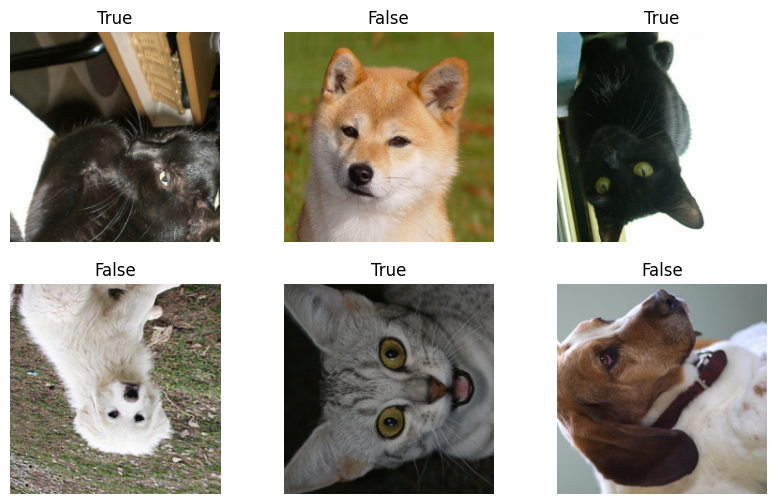

In [4]:
# show augmented batch
pets_dls.show_batch(max_n=6, figsize=(10,6))

In [5]:
# train the model
learn = vision_learner(pets_dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 243MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.302446,0.029224,0.991881,07:07


epoch,train_loss,valid_loss,accuracy,time
0,0.146943,0.023951,0.993234,10:25
1,0.086333,0.012893,0.994587,09:46
2,0.045766,0.008817,0.995940,09:34


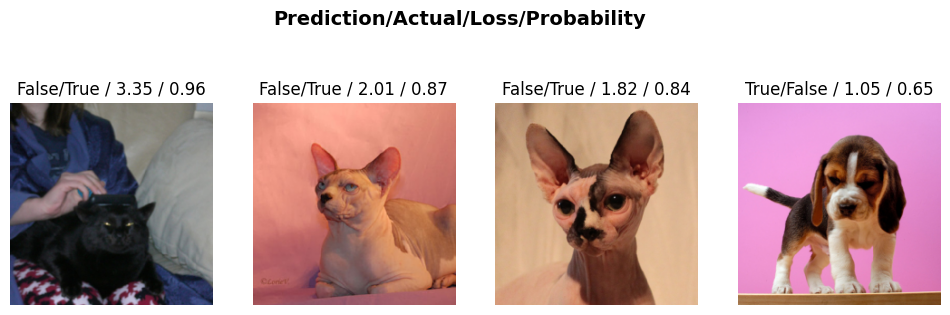

In [7]:
# show a few predictions with augmentations
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=1, figsize=(12,4))

<Axes: title={'center': 'Blended'}>

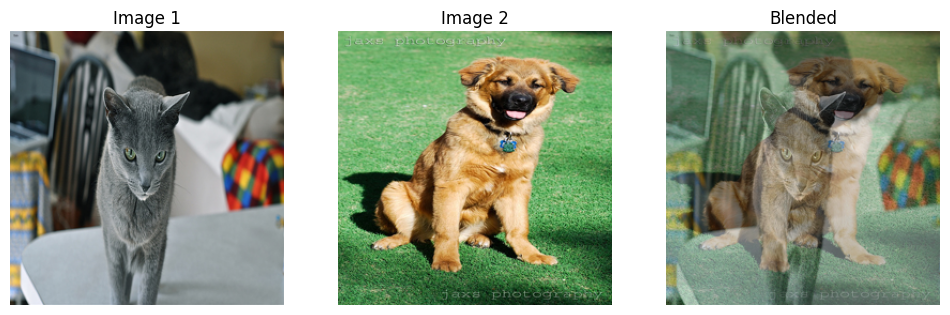

In [8]:
# mix-style image overlay
img1 = PILImage.create(get_image_files(path)[0]).resize((256,256))
img2 = PILImage.create(get_image_files(path)[1]).resize((256,256))

t1 = tensor(img1).float() / 255.
t2 = tensor(img2).float() / 255.

_, axs = plt.subplots(1, 3, figsize=(12, 4))
show_image(t1, ax=axs[0], title='Image 1')
show_image(t2, ax=axs[1], title='Image 2')
show_image((0.6 * t1 + 0.4 * t2), ax=axs[2], title='Blended')